In [25]:
from pathlib import Path
import itertools

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.path as mpath
import matplotlib.pyplot as plt

from matplotlib import rcParams


import themepy
spath = Path("../")

theme = themepy.Theme('paper')

rcParams['path.sketch'] = (.5, 100, 25)

%matplotlib inline

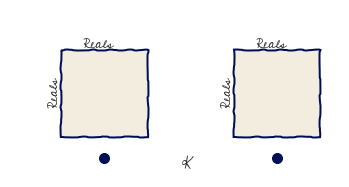

In [26]:
fig, ax = plt.subplots()

f1 = mpatches.Rectangle((2,4), 2, 2, facecolor=ax.get_facecolor(), edgecolor='C0', linewidth=2)
ax.add_patch(f1)
ax.annotate("Reals", (1.75, 4.75), fontsize=14, rotation=90)
ax.annotate("Reals", (2.5, 6.05), fontsize=14)

f2 = mpatches.Rectangle((6,4), 2, 2, facecolor=ax.get_facecolor(), edgecolor='C0', linewidth=2)
ax.add_patch(f2)
ax.annotate("Reals", (5.75, 4.75), fontsize=14, rotation=90)
ax.annotate("Reals", (6.5, 6.05), fontsize=14)

ax.scatter([3, 7], [3.5, 3.5], s=100)
ax.annotate('K', (4.8,3.25), fontsize=16)

ax.set(ylim=(3, 7), xlim=(.75,8.5), aspect='equal')
ax.axis('off')

fig.savefig(spath/"temp_1k.png", bbox_inches='tight' , facecolor='white')


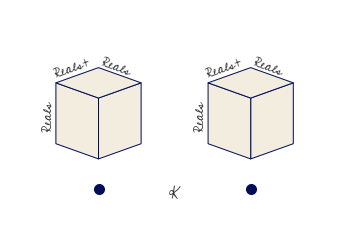

In [27]:

fig, ax = plt.subplots()
verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
verts2 = verts + [5,0]
p = mcollections.PolyCollection(np.vstack([verts, verts2]), edgecolor='C0', facecolor=ax.get_facecolor() )
ax.add_collection(p)
ax.scatter([1,6], [-2, -2], s=100)
ax.annotate('K', (3.3, -2.3), fontsize=16)
ax.set(xlim=(-2,9), ylim=(-3,4), aspect='equal')

ax.annotate("Reals", (-.8, 0), rotation=90, fontsize=14)#side 1
ax.annotate("Reals", (4.2, 0), rotation=90, fontsize=14)#side 2

ax.annotate("Reals+", (-.5, 1.65), rotation=20, fontsize=14)
ax.annotate("Reals+", (4.5, 1.65), rotation=20, fontsize=14)

ax.annotate("Reals", (1,1.75), rotation=-20, fontsize=14)
ax.annotate("Reals", (6,1.75), rotation=-20, fontsize=14)
ax.axis('off')
fig.savefig(spath/"temp_3f.png", bbox_inches='tight' , facecolor='white')


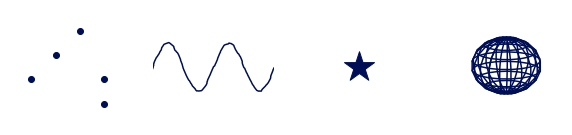

In [28]:
fig, axd = plt.subplot_mosaic([["dots", "line", "box", "sphere"]], figsize=(10,5))
for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xlim=(0,5), ylim=(0,5))
    axd[k].axis('off')
axd['sphere'].remove()
axd['sphere'] = fig.add_subplot(1,4,4,projection='3d', proj_type='ortho')

axd['dots'].scatter([1,4,3,4, 2], [2,1,4,2, 3])
x = np.linspace(-3*np.pi, 3*np.pi, 100)
axd['line'].plot(x, np.sin(x*2.5)+2.5)
axd['box'].scatter(2.5, 2.5, marker='*', s=1000)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)*5
y = np.sin(u)*np.sin(v)*5
z = np.cos(v)*5
axd['sphere'].plot_wireframe(x, y, z)
axd['sphere'].axis('off')
axd['sphere'].view_init(15, azim=30)
axd['sphere'].set_facecolor('white')
fig.savefig(spath/"k_different_types.png", bbox_inches='tight', facecolor='white' )

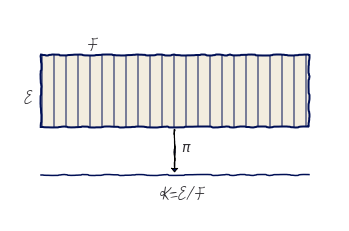

In [29]:
fig, ax = plt.subplots()
E = mpatches.Rectangle((0.1, 0.4), .8, .3,  hatch='|', facecolor=ax.get_facecolor(), edgecolor='C0', linewidth=2)
ax.add_patch(E)
ax.annotate('E', (.05, .5), fontsize=16)
line = ax.axhline(y=.2, xmin=0.1, xmax=0.9)
ax.annotate('K=E/F', (.455, .1), fontsize=16)
ax.annotate('F', (.24, 0.72), fontsize=16)
ax.annotate(r'$\pi$', (.52, 0.3), fontsize=14)
ax.arrow(.5, .39, 0, -.16,  head_width=0.02, head_length=0.015)
ax.set(xlim=(0,1), ylim=(0,.9))
ax.axis('off')
fig.savefig(spath/"k_qspace.png", bbox_inches='tight', facecolor='white')

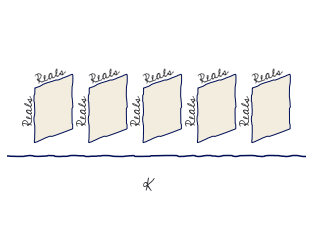

In [30]:
fig, ax = plt.subplots()
for off in np.arange(0,10,2):
    verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
    ax.add_patch(p)
    ax.annotate("Reals", (1+off, 1.15), rotation=20, fontsize=14)
    ax.annotate("Reals", (.65+off, -.25), rotation=90, fontsize=14)
    
ax.annotate('K', (5, -2.75), fontsize=16)
ax.axhline(y=-1.5, zorder=-1)

ax.set(xlim=(-0,11), ylim=(-4, 4), aspect='equal')
ax.axis('off')
fig.savefig(spath/"temp_2f.png", bbox_inches='tight', facecolor='white' )

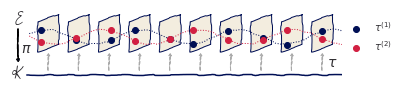

In [31]:
fig, ax = plt.subplots()
x =  np.linspace(-5*np.pi, 7*np.pi)
xv = x[(x>0) & (x <30)]
ys = np.sin(xv)*.5
yc = np.cos(xv+1)*.5

for off in np.arange(0,20,2):
    verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
    ax.add_patch(p)
    ax.arrow(off+1.7, -2.25, 0, 1, head_width=0.2, head_length=0.15, linestyle='--', color='darkgrey')


inds = [1, 4, 7, 9, 12, 14, 17, 20, 22, 25]
ax.scatter(xv[inds], ys[inds], color='C0', label=r'$\tau^{(1)}$', zorder=10)
ax.scatter(xv[inds], yc[inds], color='C1', label=r'$\tau^{(2)}$', zorder=10)
ax.plot(xv, ys, color='C0', linewidth=1, linestyle=':')
ax.plot(xv, yc, color='C1', linewidth=1, linestyle=':')

ax.annotate('E', (-.5, .8), fontsize=16)
ax.annotate('K', (-.7, -2.75), fontsize=16)
ax.arrow(-.3, .55, 0, -2, head_width=0.2, head_length=0.15)
ax.annotate(r'$\pi$', (-.1, -1), fontsize=14)
ax.annotate(r'$\tau$', (20, -1.95), fontsize=14)
ax.axhline(y=-2.5, xmin=0.06, zorder=-1)
ax.legend(bbox_to_anchor=(1.0, .45), loc='lower left', borderaxespad=0, facecolor='white', frameon=False)

ax.set(xlim=(-1,21), ylim=(-4, 2), aspect='equal')
ax.axis('off')
fig.savefig(spath/"fiberbundle.png", bbox_inches='tight', facecolor='white' )